In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, classification_report, confusion_matrix




In [ ]:
import os
os.getcwd()


In [ ]:
os.listdir()

In [44]:
df = pd.read_csv(r"C:\Users\Anvesh Bajirao\OneDrive\Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.shape


(7043, 21)

In [46]:
df_raw = df.copy()


In [47]:
df.columns = df.columns.str.strip()


In [48]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [49]:
df = df.dropna(subset=['TotalCharges'])


In [50]:
df['Churn'].dtype
df['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [51]:
df['Churn'] = df['Churn'].str.strip()


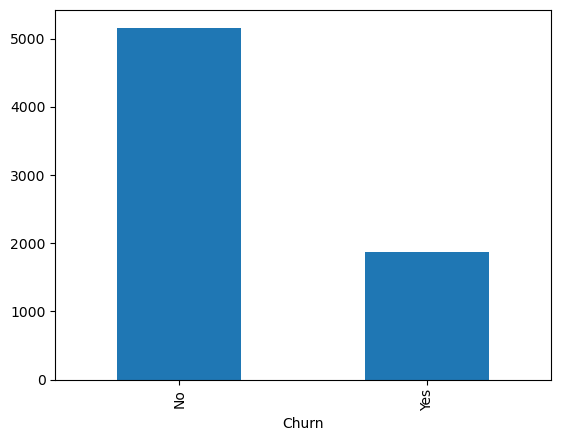

In [52]:
df['Churn'].value_counts().plot(kind='bar')
plt.show()


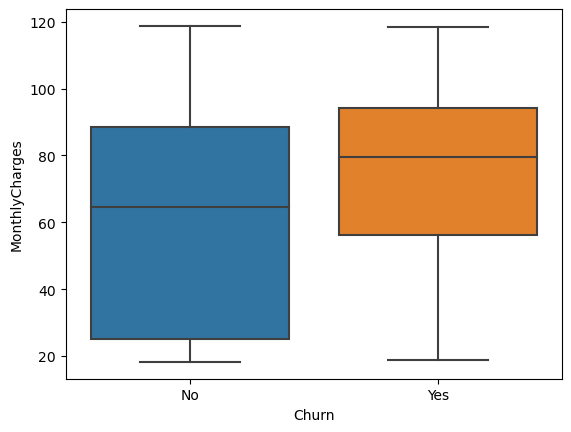

In [53]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()


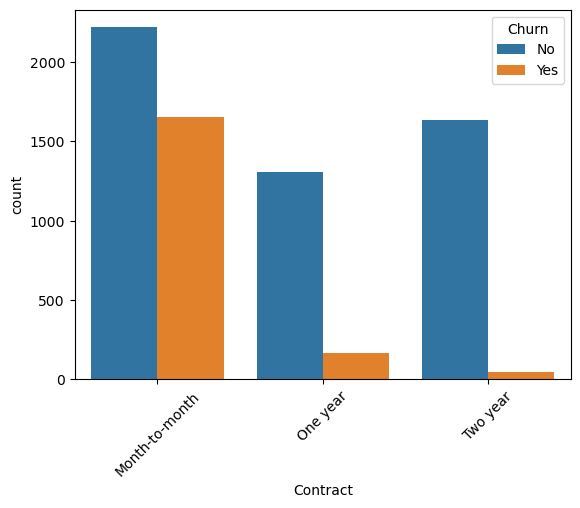

In [54]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.show()


In [55]:
df.drop('customerID', axis=1, inplace=True)


In [56]:
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [57]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression
Accuracy: 0.7938877043354655
Recall: 0.5641711229946524
ROC-AUC: 0.8344873195251876


In [60]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest
Accuracy: 0.7867803837953091
Recall: 0.4919786096256685
ROC-AUC: 0.8138281626124005


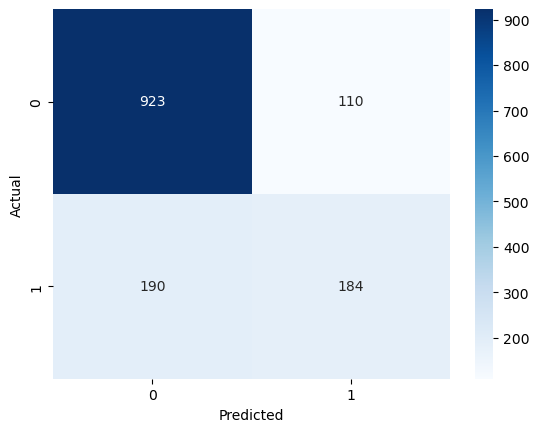

In [61]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [62]:
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


TotalCharges       0.185379
MonthlyCharges     0.176604
tenure             0.160264
Contract           0.081759
PaymentMethod      0.049956
OnlineSecurity     0.048717
TechSupport        0.039460
InternetService    0.029103
gender             0.028242
OnlineBackup       0.027947
dtype: float64